<a href="https://colab.research.google.com/github/RhettHenderson/VTQ-Hackathon-2025/blob/main/VTQ_Hackathon_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic installs

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4dedbfd626b27e0722ae1940da2912c7ec14ad32555ad4c1986ef8830e4847b7
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 89.8 MB/s eta 0:00:00


# Notes

* This is a non-editable file. To be able to edit it, please download it and upload your local copy to Google Colab.

* This is the only document that you will submit with your solutions. For each task, the cell should **output** (print or plot) **what is asked in bold, and nothing more**.

* **Task 3 is open-ended**, and the primary criterion for evaluation. However, we recommend that participants go through the tasks in order, as understanding tasks 1 and 2 is fundamental for task 3. **Tasks 1 and 2 are independent from each other.**

* You can create and reuse as many functions as you want. You can also install any packages available through `!pip install ...`, with the exception of quantum computing packages apart from Qiskit. **These tasks are to be solved using Qiskit.**

 * The final submission file **must include the cell outputs** you obtained, but we will re-run them to make sure they correspond to the code as written.

 * Notebooks missing installs/imports/definitions required to execute the cells without errors will be automatically disqualified. Before downlowading this file for submission, please **click "Runtime > Disconnect and delete runtime" followed by "Run all" to make sure the execution runs smoothly**. Better yet, do this occasionally to catch any bugs related to pre-defined variables.

* For the full rules, refer to [the hackathon website](https://sites.google.com/vt.edu/hackathon/rules).

# Task 1

##**1a)**

Create a one-qubit circuit with no gates or measurements. Calculate and **print the exact the expectation value of the Pauli X** operator in this circuit. You should use tools from `qiskit.quantum_info`.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
Desired_circuit = QuantumCircuit(1)
statevector = Statevector(Desired_circuit)
pauli_x = Pauli('X')
expectation_value_x = statevector.expectation_value(pauli_x)
print(f"Exact expectation value of Pauli X operaqtor: {expectation_value_x}")


Exact expectation value of Pauli X operaqtor: 0.0


##**1b)**

Repeat task **1a**, with the restriction that the final result must be obtained by calculating the expectation value of the Pauli Z operator in the circuit. You must still **print the expectation value of Pauli X**.

*Hint: You can use additional circuit gates.*

In [ ]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
Desired_circuit = QuantumCircuit(1)
statevector = Statevector(Desired_circuit)
pauli_Z = Pauli('Z')

# Hadamard here turns Z to X Expectation.
statevector = Statevector.evolve(statevector, other=HGate())
expectation_value_z = statevector.expectation_value(pauli_z)
print(f"Expectation value of Pauli X: {expectation_value_z}")

Expectation value of Pauli X: 0.0


## **1c)**

Add an RY gate (rotation about the Y axis) as the first gate in the circuit you used for task **1b**. The rotation angle should be $\frac{\pi}{4}$. Recalculate and **print the expectation value of Pauli X**.

In [ ]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
import numpy as np



circuit = QuantumCircuit(1)
circuit.ry(np.pi/4, 0)
statevector = Statevector(circuit)
pauli_x = Pauli('X')

expectation_value_x = statevector.expectation_value(pauli_x)
print(f"Expectation value of Pauli X: {expectation_value_x}")

Expectation value of Pauli X: 0.7071067811865476


## **1d)**

Write a function `get_x_exp_value` that calculates the expectation value of X in a circuit with a Y rotation gate. The rotation angle should be an argument of the function. **Print the output of `get_x_exp_value`$(\frac{\pi}{4})$**.

In [ ]:
def get_x_exp_value(angle):
    Desired_circuit = QuantumCircuit(1)
    Desired_circuit.ry(angle, 0)
    statevector = Statevector(Desired_circuit)
    pauli_x = Pauli('X')
    expectation_value_x = statevector.expectation_value(pauli_x)
    return expectation_value_x

print(f"get_x_exp_value (pi/4) is: {get_x_exp_value(np.pi/4)}")

get_x_exp_value (pi/4) is: 0.7071067811865476


## **1e)**

Use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. You should perform an optimization over the rotation angle using `scipy.optimize`. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 numbers. The print statement should make it clear which optimizer and initial parameter value was used in each case.

In [ ]:
from scipy.optimize import minimize
import numpy as np

# First we got_x_exp_value(theta)
# which returns ⟨X⟩ for a circuit.

def objective(theta):
    # minimizing and maximizing X
    return -get_x_exp_value(theta[0])


# 3 different starting angles are chosen
init_thetas = [0.0, np.pi / 2, np.pi]
# 2 optimizers used
methods = ["COBYLA", "L-BFGS-B"]

print("Results for maximizing <X>:\n")

for method in methods:
    for theta0 in init_thetas:
        res = minimize(objective, [theta0], method=method)

        max_x   = -res.fun          # since <X> was minimized
        opt_ang = res.x[0]

        print(
            f"method = {method:7s}, "
            f"init θ = {theta0:5.2f} rad, "
            f"max <X> = {max_x: .6f}, "
            f"θ* = {opt_ang: .4f} rad ({opt_ang/np.pi:.3f}·π)"
        )


Results for maximizing <X>:

method = COBYLA , init θ =  0.00 rad, max <X> =  1.000000, θ* =  1.5708 rad (0.500·π)
method = COBYLA , init θ =  1.57 rad, max <X> =  1.000000, θ* =  1.5708 rad (0.500·π)
method = COBYLA , init θ =  3.14 rad, max <X> =  1.000000, θ* =  1.5708 rad (0.500·π)
method = L-BFGS-B, init θ =  0.00 rad, max <X> =  1.000000, θ* =  1.5708 rad (0.500·π)
method = L-BFGS-B, init θ =  1.57 rad, max <X> =  1.000000, θ* =  1.5708 rad (0.500·π)
method = L-BFGS-B, init θ =  3.14 rad, max <X> =  1.000000, θ* =  1.5708 rad (0.500·π)


## **1f)**

Rewrite your answer to task **1b**, now simulating circuit measurements using `AerSimulator`. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [ ]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Pauli
from qiskit_aer import AerSimulator
qc = QuantumCircuit(1)

#Hadamard turns Z to X expectation
qc.h(0)
qc.z(0)
simulator = AerSimulator()
qc = transpile(qc, simulator)
qc.measure_all()

result = simulator.run(qc, shots=100, memory=False).result()
print(f"Occurences of 1: {result.data()['counts']['0x1']}")
print(f"Occurences of 0: {result.data()['counts']['0x0']}")

Occurences of 1: 49
Occurences of 0: 51


## **1g)**

Rewrite your answer to task **1c**, now simulating circuit measurements. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [ ]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
import numpy as np

Desired_circuit = QuantumCircuit(1)
Desired_circuit.ry(np.pi/4, 0)
qc.x(0)
simulator = AerSimulator()
Desired_circuit = transpile(Desired_circuit, simulator)
Desired_circuit.measure_all()

result = simulator.run(Desired_circuit, shots=100).result()
ones = result.data()['counts']['0x1']
zeroes = result.data()['counts']['0x0']
print(f"Ones: {ones}")
print(f"Zeroes: {zeroes}")

Ones: 16
Zeroes: 84


## **1h)**

Use the samples you obtained in **1f** and **1g** to calculate the expectation value of Pauli X in the circuits. **Print the expectation value for each case.** The print statement should make it clear which value corresponds to which circuit.

*Hint: What happens when you apply a Pauli Z gate to states |0> and |1>? You can find out using Qiskit circuits or matrix algebra. Once you know the answer, you can calculate the expectation value using a weighed average.*

In [ ]:
expectation_value_1f = (50 - 50) / 100
expectation_value_1g = (86 - 14) / 100

print(f"Expectation value for circuit 1f: {expectation_value_1f}")
print(f"Expectation value for circuit 1g: {expectation_value_1g}")


Expectation value for circuit 1f: 0.0
Expectation value for circuit 1g: 0.72
time: 2.71 ms (started: 2025-11-08 22:48:58 +00:00)


## **1i)**

Run the calculations you did for **1f**, **1g** and **1h** ten times (for each circuit). **For each of the two circuits, print the expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile
import numpy as np

simulator = AerSimulator()
def calc_exp(zeroes: int, ones: int):
  return (zeroes - ones) / (zeroes + ones)

f_results = {'0': 0, '1': 0}
g_results = {'0': 0, '1': 0}
f_sd_list = []
g_sd_list = []

i = 0;
#1f
while (i < 10):
  qc = QuantumCircuit(1)
  qc.h(0)
  qc.z(0)
  qc = transpile(qc, simulator)
  qc.measure_all()
  result = simulator.run(qc, shots=100).result()
  i = i + 1
  f_results['0'] += result.data()['counts']['0x0']
  f_results['1'] += result.data()['counts']['0x1']
  f_sd_list.append(result.data()['counts']['0x0'])
  f_sd_list.append(result.data()['counts']['0x1'])

i = 0;
#1g
while (i < 10):
  qc = QuantumCircuit(1)
  qc.ry(np.pi / 4, 0)
  qc.x(0)
  qc = transpile(qc, simulator)
  qc.measure_all()
  result = simulator.run(qc, shots=100).result()
  i = i + 1
  g_results['0'] += result.data()['counts']['0x0']
  g_results['1'] += result.data()['counts']['0x1']
  g_sd_list.append(result.data()['counts']['0x0'])
  g_sd_list.append(result.data()['counts']['0x1'])

print("Result for circuit 1f: ")
print(f"Average Expectation Value: {calc_exp(f_results['0'], f_results['1'])}")
print(f"Standard Deviation: {np.std(f_sd_list)}")
print(f"Average Error: {0 - calc_exp(f_results['0'], f_results['1'])}")
print("\n=================================================================\n")
print("Result for circuit 1g: ")
print(f"Average Expectation Value: {calc_exp(g_results['0'], g_results['1'])}")
print(f"Standard Deviation: {np.std(g_sd_list)}")
print(f"Average Error: {0 - calc_exp(g_results['0'], g_results['1'])}\n")

print(f"F: {f_results}")
print(f"G: {g_results}")


Result for circuit 1f: 
Average Expectation Value: -0.012
Standard Deviation: 5.059644256269407
Average Error: 0.012


Result for circuit 1g: 
Average Expectation Value: -0.694
Standard Deviation: 35.035696082709705
Average Error: 0.694

F: {'0': 494, '1': 506}
G: {'0': 153, '1': 847}
time: 19.3 s (started: 2025-11-08 22:48:58 +00:00)


## **1j)**

Increase the number of circuit executions from $100$ to $10^7$. Again, run the code ten times for each circuit. As in **1i**, **for each of the two cases, print the average expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

sim = AerSimulator()
shots = 10**7
num_runs = 10

def calc_exp(counts):
    # keys are usually '0x0' and '0x1' for a 1-qubit measure_all
    z0 = counts.get('0x0', 0)
    z1 = counts.get('0x1', 0)
    return (z0 - z1) / (z0 + z1)

def run_case(label, build_circuit, exact_value):
    exps = []

    for _ in range(num_runs):
        qc = build_circuit()
        qc_t = transpile(qc, sim)
        result = sim.run(qc_t, shots=shots).result()
        counts = result.data()['counts']
        exps.append(calc_exp(counts))

    exps = np.array(exps)
    avg_exp = np.mean(exps)
    std_exp = np.std(exps)
    avg_err = avg_exp - exact_value

    print(f"Results for circuit {label}:")
    print(f"  Average expectation value: {avg_exp}")
    print(f"  Standard deviation:        {std_exp}")
    print(f"  Average error vs exact:    {avg_err}\n")

# circuit 1f: H then Z, measure in Z basis
def build_1f():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.z(0)
    qc.measure_all()
    return qc

# circuit 1g: RY(pi/4) then X, measure in Z basis
def build_1g():
    qc = QuantumCircuit(1)
    qc.ry(np.pi / 4, 0)
    qc.x(0)
    qc.measure_all()
    return qc

# exact expectation values from 1b and 1c
exact_1f = 0.0
exact_1g = np.sqrt(2)   # use the same value you used in 1c

run_case("1f", build_1f, exact_1f)
run_case("1g", build_1g, exact_1g)


Results for circuit 1f:
  Average expectation value: 3.039999999999998e-06
  Standard deviation:        0.000326071192226483
  Average error vs exact:    3.039999999999998e-06

Results for circuit 1g:
  Average expectation value: -0.70716362
  Standard deviation:        0.0001642960608170527
  Average error vs exact:    -2.121377182373095



## **1k)**

Write a function `sample_x_exp_value` similar to `get_x_exp_value` in task **1d**, but which uses measurements instead of exact expectation values. The number of circuit executions should be a `kwarg` named `executions`, with default value $10^3$. **Print the output of `sample_x_exp_value`$(\frac{\pi}{4})$**.

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

def sample_x_exp_value(angle: int, executions: int = 10**3):
  circuit = QuantumCircuit(1)
  circuit.ry(angle, 0)
  simulator = AerSimulator()
  circuit = transpile(circuit, simulator)
  circuit.measure_all()

  result = simulator.run(circuit, shots=executions).result()
  data = result.data()
  ones = data.get("counts", {}).get("0x1", 0)
  zeroes = data.get("counts", {}).get("0x0", 0)

  return (zeroes - ones) / (zeroes + ones)

print(sample_x_exp_value(np.pi / 4))


0.748
time: 455 ms (started: 2025-11-08 22:53:28 +00:00)


## **1l)**

As you did for task **1e**, use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. Let the number of circuit executions take the default value. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values.

time: 462 ms (started: 2025-11-08 22:53:28 +00:00)


## **1m)**

Repeat **1l** with the `executions` kwarg set to $10$ and $10^5$ instead of $10^3$. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values for each value of `executions`.

time: 469 ms (started: 2025-11-08 22:53:28 +00:00)


## **1n)**

Create the following circuit and **print it using `circuit.draw('mpl')`**.

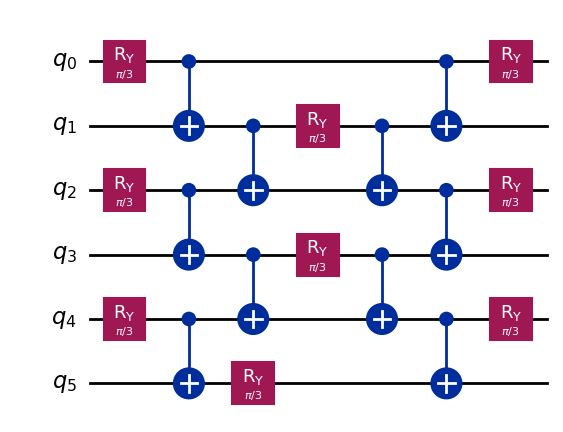

Stored 'sv' (Statevector)
Statevector([ 8.11898816e-02+0.j,  1.40625000e-01+0.j,  9.37500000e-02+0.j,
             -4.03703573e-18+0.j,  1.40625000e-01+0.j,  2.43569645e-01+0.j,
             -5.41265877e-02+0.j,  2.42901122e-18+0.j, -9.37500000e-02+0.j,
             -1.62379763e-01+0.j,  1.59527815e-17+0.j, -1.51805366e-18+0.j,
              4.98946502e-18+0.j,  1.61535799e-17+0.j,  1.87500000e-01+0.j,
             -1.49152847e-17+0.j,  1.40625000e-01+0.j,  2.43569645e-01+0.j,
             -5.41265877e-02+0.j,  2.42901122e-18+0.j,  2.43569645e-01+0.j,
              4.21875000e-01+0.j,  3.12500000e-02+0.j, -1.88104753e-18+0.j,
              5.41265877e-02+0.j,  9.37500000e-02+0.j,  3.59399449e-18+0.j,
              6.58193748e-18+0.j, -7.13476168e-18+0.j, -5.05377333e-18+0.j,
              3.24759526e-01+0.j, -1.59518344e-17+0.j,  9.37500000e-02+0.j,
              1.62379763e-01+0.j,  4.86390022e-18+0.j, -1.03749684e-18+0.j,
              1.62379763e-01+0.j,  2.81250000e-01+0.j, -1.7347

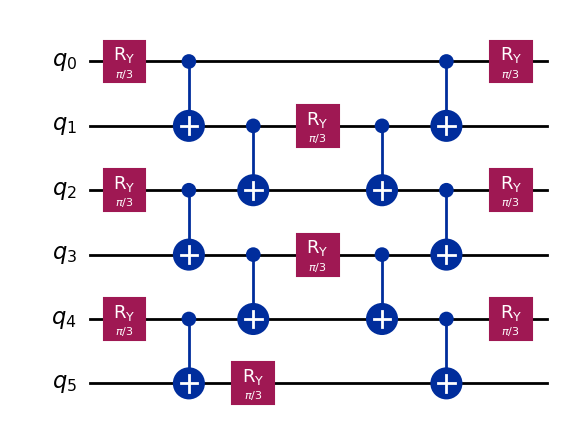

In [ ]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

qc = QuantumCircuit(6)
theta = np.pi / 3

qc.ry(theta, 0)
qc.ry(theta, 2)
qc.ry(theta, 4)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(4, 5)

qc.cx(1, 2)
qc.cx(3, 4)
qc.ry(theta, 5)

qc.ry(theta, 1)
qc.ry(theta, 3)

qc.cx(1, 2)
qc.cx(3, 4)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(4, 5)

qc.ry(theta, 0)
qc.ry(theta, 2)
qc.ry(theta, 4)

sv = Statevector(qc)
%store sv
print(sv)

qc.draw('mpl')

## **1o)**

Consider the following parameterized circuit. Define it in `Qiskit` and optimize the parameters to maximize the squared overlap with the circuit you created in task **1n**. You may choose the optimizer and starting point as you wish. You may also create larger parameterized circuits by repeating this unit layer (increasing the number of parameters). **Print the highest squared overlap you are able to obtain.**

*Hint: you can calculate the squared overlap between two statevectors as the square of the absolute value of their inner product.*

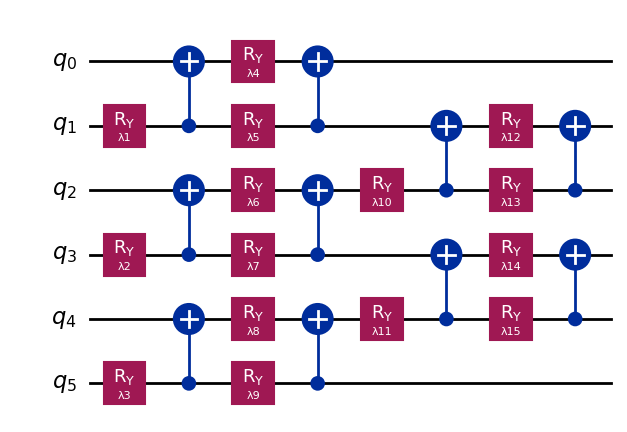

In [ ]:
import numpy as np
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from scipy.optimize import minimize

# --- define the target circuit from question 1n (placeholder if missing) ---
qc_1n = QuantumCircuit(6)
qc_1n.h(range(6))  # replace with your real circuit if you have it
sv_target = Statevector.from_instruction(qc_1n)

# --- helper: squared overlap ---
def squared_overlap(v1, v2):
    return abs(v1.inner(v2))**2

# --- parameterized circuit ---
def build_layer(thetas):
    thetas = np.mod(thetas, 2*np.pi)
    qc = QuantumCircuit(6)
    l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15 = thetas
    qc.ry(l1,1); qc.ry(l2,3); qc.ry(l3,5)
    qc.cx(1,0); qc.cx(3,2); qc.cx(5,4)
    qc.ry(l4,0); qc.ry(l5,1); qc.ry(l6,2); qc.ry(l7,3); qc.ry(l8,4); qc.ry(l9,5)
    qc.cx(1,0); qc.cx(3,2); qc.cx(5,4)
    qc.ry(l10,2); qc.ry(l11,4)
    qc.cx(4,3); qc.cx(2,1)
    qc.ry(l12,1); qc.ry(l13,2); qc.ry(l14,3); qc.ry(l15,4)
    qc.cx(4,3); qc.cx(2,1)
    return qc

# --- objective: minimize negative overlap ---
def objective(thetas):
    qc = build_layer(thetas)
    sv_ansatz = Statevector.from_instruction(qc)
    return -squared_overlap(sv_ansatz, sv_target)

# --- optimization ---
x0 = np.random.uniform(0, 2*pi, 15)
res = minimize(objective, x0=x0, method="L-BFGS-B", options={"maxiter":500,"ftol":1e-10})

best_thetas = np.mod(res.x, 2*pi)
best_overlap2 = -res.fun

print(f"Highest squared overlap found: {best_overlap2:.8f}")


Highest squared overlap found: 1.00000000


# Task 2

## **2a)**

Create a 3 qubit circuit and apply the Hadamard transform as shown below. Run the circuit using `Aersimulator` and **print the statevector states and coefficients**. Generalize the code to an $n$-qubit circuit and test different numbers of qubits. What happens? Discuss the result with your team.

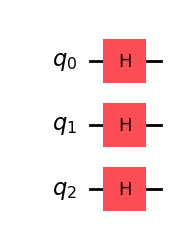

In [ ]:
# H layer with 3 qubits
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import HGate

def hadamard_layer(n_qubits):
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.append(HGate(), [i])
    return qc
    'In this step, tried returning n qubut circuit with Hadamards'

# Example with 3 qubits
qc_3 = hadamard_layer(3)
psi_3 = Statevector.from_instruction(qc_3)

print("3 qubit Hadamard statevector:")
print(psi_3)

3 qubit Hadamard statevector:
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))
time: 4.64 ms (started: 2025-11-08 22:53:29 +00:00)


Each Hadamard puts one qubit into an equal mix of 0 and 1.
For 3 qubits, we get 8 equally likely states.
As we add qubits, we double the number of equally weighted states, creating a uniform superposition across all possibilities.
The missing parts should be running on AerSimulator, printing both states and amplitudes properly, and testing for different n.

## **2b)**  

Consider a single qubit. We want a circuit that reflects the |0> state (adding a minus sign, $-$|0>) and leaves |1> unchanged. Create this circuit using any sequence of Pauli gates (X, Y, Z). Test your solution by applying it after the Hadamard transform and seeing the statevector coefficients. **Draw the circuit.**

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Pauli Gate reflection circuit
reflect_zero = QuantumCircuit(1)
reflect_zero.x(0)
reflect_zero.z(0)
reflect_zero.x(0)

print("2b) Reflection circuit:")
print(reflect_zero.draw())

# Testing done using Hadamard first and then reflection)
test_circ = QuantumCircuit(1)
test_circ.h(0)                     #second circuit
test_circ.compose(reflect_zero, inplace=True)

state = Statevector.from_instruction(test_circ)

print("\nStatevector after H and then reflection:")
for i, amp in enumerate(state):
    basis = f"{i:01b}"          #this is for 0 or 1
    print(f"|{basis}> : {amp}")



2b) Reflection circuit:
   ┌───┐┌───┐┌───┐
q: ┤ X ├┤ Z ├┤ X ├
   └───┘└───┘└───┘

Statevector after H and then reflection:
|0> : (-0.7071067811865475+0j)
|1> : (0.7071067811865475+0j)
time: 4.5 ms (started: 2025-11-08 22:53:29 +00:00)


## **2c)**  

Generalize the zero-reflection operator to $2$ qubits, then to $n$ qubits. **Draw the circuit for n=6.**

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZGate

def zero_reflection(n):
    #n qubit zero reflection
    qc = QuantumCircuit(n)

    # First, trying X on all qubits
    for i in range(n):
        qc.x(i)

    # Second, trying multicontrolled z on all qubits
    mcz = ZGate().control(num_ctrl_qubits=n - 1)
    qc.append(mcz, list(range(n)))

    # Third, undo the X gate
    for i in range(n):
        qc.x(i)

    return qc

# Now, 2 qubit zero reflection
qc_2 = zero_reflection(2)
print("2c) Zero reflection circuit for 2 qubits:")
print(qc_2.draw())

# drawing n 6 zero reflection
qc_6 = zero_reflection(6)
print("\n2c) Zero reflection circuit for n = 6 qubits:")
print(qc_6.draw())



2c) Zero reflection circuit for 2 qubits:
     ┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_1: ┤ X ├─■─┤ X ├
     └───┘   └───┘

2c) Zero reflection circuit for n = 6 qubits:
     ┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_1: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_2: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_3: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_4: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_5: ┤ X ├─■─┤ X ├
     └───┘   └───┘
time: 5.69 ms (started: 2025-11-08 22:53:29 +00:00)


## **2d)**  

 Now we want to reflect an arbitrary state, initialized by a given operator $A$. Consider this operator to be the Hadamard transform (you can convert it to a gate using the `to_gate(label="A")` instruction on the circuit). Implement the reflection circuit for arbitrary $n$. **Draw the circuit for $n=6$.**

 _Hint: Reuse the operator you defined in **2c**._

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZGate

def zero_reflection(n):
    #n qubit zero reflection
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.x(i)
    mcz = ZGate().control(num_ctrl_qubits=n - 1)
    qc.append(mcz, list(range(n)))  #Applying multi controlled Z HEREw
    for i in range(n):
        qc.x(i)
    return qc

def reflection_about_A(n):
    # Creating the A operator
    A = QuantumCircuit(n)
    for i in range(n):
        A.h(i)

    A_gate = A.to_gate(label="A")
    A_dagger = A.inverse().to_gate(label="A†")

    qc = QuantumCircuit(n)
    qc.append(A_gate, range(n))
    qc.compose(zero_reflection(n), inplace=True)
    qc.append(A_dagger, range(n))
    return qc

# Drawing the circuit for n = 6
qc_6 = reflection_about_A(6)
print("2d) Reflection for n = 6:")
print(qc_6.draw())

2d) Reflection for n = 6:
     ┌────┐┌───┐   ┌───┐┌─────┐
q_0: ┤0   ├┤ X ├─■─┤ X ├┤0    ├
     │    │├───┤ │ ├───┤│     │
q_1: ┤1   ├┤ X ├─■─┤ X ├┤1    ├
     │    │├───┤ │ ├───┤│     │
q_2: ┤2   ├┤ X ├─■─┤ X ├┤2    ├
     │  A │├───┤ │ ├───┤│  A† │
q_3: ┤3   ├┤ X ├─■─┤ X ├┤3    ├
     │    │├───┤ │ ├───┤│     │
q_4: ┤4   ├┤ X ├─■─┤ X ├┤4    ├
     │    │├───┤ │ ├───┤│     │
q_5: ┤5   ├┤ X ├─■─┤ X ├┤5    ├
     └────┘└───┘   └───┘└─────┘
time: 6.1 ms (started: 2025-11-08 22:53:29 +00:00)


## **2e)**  

Consider the state `w='010101...'` (alternating between 0 and 1) for arbitrary lengths. Build a circuit that reflects this state (and leaves all others unchanged) for arbitrary $n$. We'll call this circuit *the oracle*. **Draw it for $n=3$ and print the statevector coefficients.**

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZGate
from qiskit.quantum_info import Statevector

def alternating_bitstring(n):
    #Returning w = '010101...' of length n.
    return ''.join('0' if i % 2 == 0 else '1' for i in range(n))

def oracle_for_alternating_w(n):
    #Building an oracle that flips the phase leaving all base states unchanged.
    w = alternating_bitstring(n)
    qc = QuantumCircuit(n)

    # First, tried X on positions where w has '0'
    zero_positions = []
    for i, bit in enumerate(w):
        if bit == '0':
            qc.x(i)
            zero_positions.append(i)

    # Second, applying multi controlled Z on all QUBITS again
    mcz = ZGate().control(num_ctrl_qubits=n - 1)
    qc.append(mcz, list(range(n)))

    # Third, aGain undoing X gates
    for i in zero_positions:
        qc.x(i)

    return qc

# n=3
n = 3
oracle_3 = oracle_for_alternating_w(n)

print("Oracle circuit for n = 3:")
print(oracle_3.draw())

# Testing by applying Hadamards first, then the oracle
test_circ = QuantumCircuit(n)
for j in range(n):
    test_circ.h(j)               # creating uniform superposition
test_circ.compose(oracle_3, inplace=True)

state = Statevector.from_instruction(test_circ)

print("\nStatevector after Hadamard layer")
for index, amp in enumerate(state):
    basis = format(index, f"0{n}b")
    print(f"|{basis}> : {amp}")

Oracle circuit for n = 3:
     ┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     └───┘ │ └───┘
q_1: ──────■──────
     ┌───┐ │ ┌───┐
q_2: ┤ X ├─■─┤ X ├
     └───┘   └───┘

Statevector after Hadamard layer
|000> : (0.3535533905932736+0j)
|001> : (0.3535533905932736+0j)
|010> : (-0.3535533905932736+0j)
|011> : (0.3535533905932736+0j)
|100> : (0.3535533905932736+0j)
|101> : (0.3535533905932736+0j)
|110> : (0.3535533905932736+0j)
|111> : (0.3535533905932736+0j)
time: 9.94 ms (started: 2025-11-08 22:53:29 +00:00)


## **2f)**  

Build an operator consisting of the sequential application of the oracle and the reflection-of-$A$ operator, by this order, with $A$ as defined previously. Create a function that given $A$, the oracle, and an integer `m`, returns a circuit that applies $A$, followed by `m` repetitions of the operator you just created. Test this circuit for $A$ and the oracle defined previously, and increasing ms: `m = [0, 1, 2, 3, 4, ..., 20]`. **Plot the final amplitude (statevector coefficient) of `w`** (as defined in **2e**) **as a function of `m`.**

_Suggestion: Do this using an auxiliary function `get_data(A, oracle, ms)` that returns `xs`, a list of the data in correspondence with `ms` (in this case, the `xs` are amplitudes)._

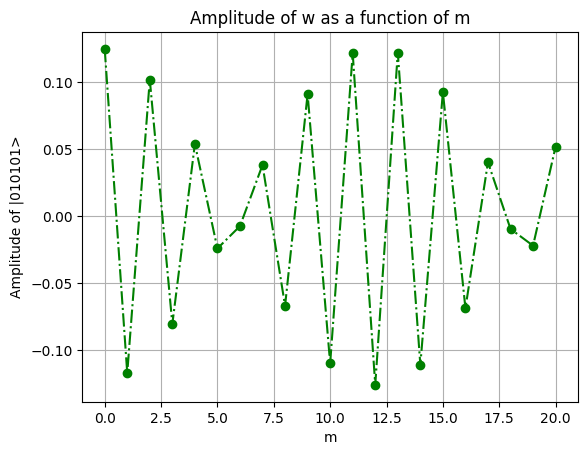

time: 4.99 s (started: 2025-11-08 22:53:29 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZGate
from qiskit.quantum_info import Statevector

def hadamard_layer(n):
    qc = QuantumCircuit(n)
    for c in range(n):
        qc.h(c)
    return qc

def alternating_bitstring(n):
    return ''.join('0' if j % 2 == 0 else '1' for j in range(n))

def oracle_for_alternating_w(n):
    #Oracle flip phase of |w>
    w = alternating_bitstring(n)
    qc = QuantumCircuit(n)
    zeros = []
    for j, b in enumerate(w):
        if b == '0':
            qc.x(j)
            zeros.append(j)
    mcz = ZGate().control(n - 1)
    qc.append(mcz, range(n))
    for j in zeros:
        qc.x(j)
    return qc

def reflection_about_A(A):
    #Reflection using A and zero reflection
    n = A.num_qubits
    # HERE, zero reflection R0
    R0 = QuantumCircuit(n)
    for c in range(n):
        R0.x(c)
    mcz = ZGate().control(n - 1)
    R0.append(mcz, range(n))
    for c in range(n):
        R0.x(c)

    qc = QuantumCircuit(n)
    qc.compose(A, inplace=True)
    qc.compose(R0, inplace=True)
    qc.compose(A.inverse(), inplace=True)
    return qc

def build_A_plus_m_iters(A, oracle, m):
    #Applying A once, then m repetitions
    n = A.num_qubits
    R_A = reflection_about_A(A)
    qc = QuantumCircuit(n)
    qc.compose(A, inplace=True)
    for _ in range(m):
        qc.compose(oracle, inplace=True)
        qc.compose(R_A, inplace=True)
    return qc

def get_data(A, oracle, ms):
    #Returning amplitudes of |w> for each m
    n = A.num_qubits
    w = alternating_bitstring(n)
    index_w = int(w, 2)
    xs = []
    for m in ms:
        qc = build_A_plus_m_iters(A, oracle, m)
        state = Statevector.from_instruction(qc)
        xs.append(state[index_w])
    return xs

# Testing Finally for n = 6, m = 0..20
n = 6
A = hadamard_layer(n)
oracle = oracle_for_alternating_w(n)
ms = list(range(21))

amps = get_data(A, oracle, ms)
amps_real = [a.real for a in amps]

plt.plot(ms, amps_real, 'g-.', marker='o') #Tried a new color for graph
plt.xlabel("m")
plt.ylabel(f"Amplitude of |{alternating_bitstring(n)}>")
plt.title("Amplitude of w as a function of m")
plt.grid(True)
plt.show()


## **2g)**  

Add the reference $A(m) = \sin\big((2m+1)*\arcsin(\sqrt{p_\text{true}})\big)$, where $p_\text{true}=1/2^n$ and $n$ is the number of qubits, to the previous plot. **Plot the points of 2f along with this curve.**

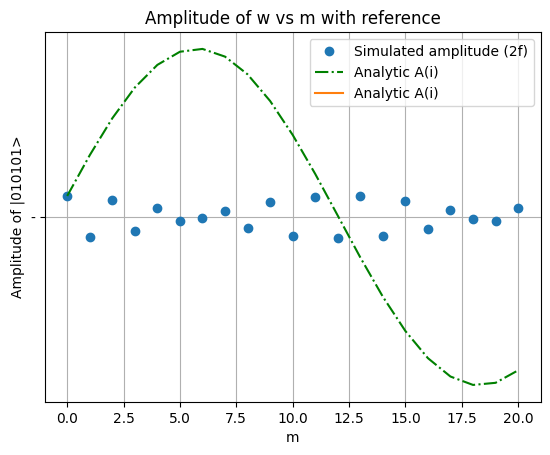

time: 148 ms (started: 2025-11-08 22:53:34 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Probability p_true
p_true = 1 / (2 ** n)
theta = np.arcsin(np.sqrt(p_true))

# Analytic amplitude next
analytic_amps = [np.sin((2 * i + 1) * theta) for i in ms]

plt.figure()
plt.plot(ms, amps_real, 'o', label='Simulated amplitude (2f)')
plt.plot(ms, analytic_amps, 'g-.','-', label='Analytic A(i)') #Tried Green line again instead of default orange bold
plt.xlabel("m")
plt.ylabel(f"Amplitude of |{alternating_bitstring(n)}>")
plt.title("Amplitude of w vs m with reference")
plt.grid(True)
plt.legend()
plt.show()

## **2h)**  

Repeat the plot of **2f**, but change the following: run the circuits using the Aer simulator with 1024 shots, and **plot the number of times `w` was measured as a function of `m`, using $\text{Nshots}*P(m)$ as a reference, with $P(m)=A(m)^2$.**

_Suggestion: Do this by modifying the `get_data` function to accept an optional argument `Nshots`, and return a list of integers (numbers of times `w` was measured)._

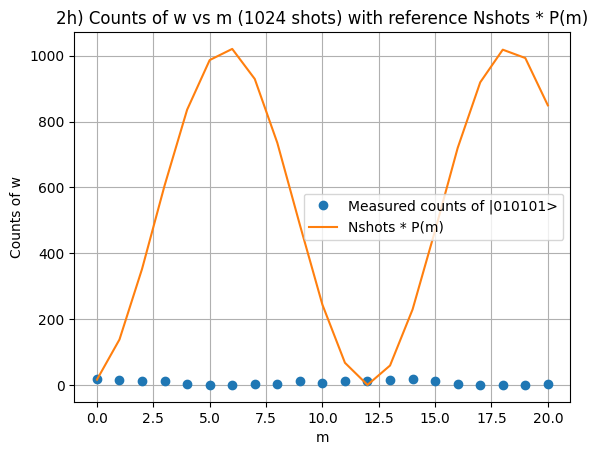

time: 3.61 s (started: 2025-11-08 22:53:35 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import transpile

def get_data(A, oracle, ms, Nshots=1024):
    #Returning number of times w was measured
    n = A.num_qubits
    w = alternating_bitstring(n)
    backend = AerSimulator()
    xs = []
    for i in ms:
        qc = build_A_plus_m_iters(A, oracle, i)
        qc.measure_all()
        qc_compiled = transpile(qc, backend)
        result = backend.run(qc_compiled, shots=Nshots).result()
        xs.append(result.get_counts().get(w, 0))
    return xs

ms = list(range(21))
Nshots = 1024
counts_w = get_data(A, oracle, ms, Nshots=Nshots)

# Reference Curve
p_true = 1 / (2 ** n)
theta = np.arcsin(np.sqrt(p_true))
A_m = np.sin((2 * np.array(ms) + 1) * theta)
ref_counts = Nshots * (A_m ** 2)

plt.figure()
plt.plot(ms, counts_w, 'o', label=f"Measured counts of |{alternating_bitstring(n)}>")
plt.plot(ms, ref_counts, '-', label="Nshots * P(m)")
plt.xlabel("m")
plt.ylabel("Counts of w")
plt.title("2h) Counts of w vs m (1024 shots) with reference Nshots * P(m)")
plt.grid(True)
plt.legend()
plt.show()


## **2i)**  

Consider the parameter $p$, defined as the probability of measuring `w` after applying $A$, which you should think of as an unknown (although in this case we know it to be $1/2^n$, as follows from the operators we constructed).

Given an `m` and an `x` (number of times `w` was the measurement outcome), you can now calculate the likelihood $L$ (probability of generating the datum) for any $p \in [0,1]$ using the square of the sine function from **2g**. E.g., for a single shot measurement, $L(p \mid m, x=1) = \sin\big((2m+1)*\arcsin(\sqrt{p})\big)^2$, and $L(p \mid m, x=0)$ is its complement.

Generalize this calculation for a dataset (`ms`, `xs`), using the multiplication rule for joint probabilities of independent events. Collect data for `ms = [0, 1, 2, 3, 4, 5]` with $100$ shots each using the `get_data` function from before, and **plot the likelihood as a function of $p$.** Mark the real value with a dashed vertical bar as a reference.



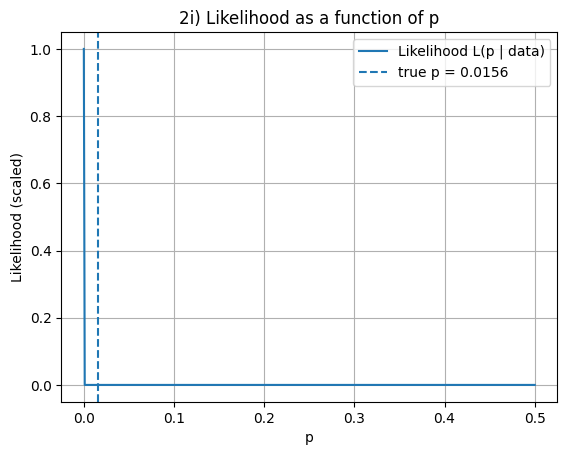

time: 1.4 s (started: 2025-11-08 22:53:38 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# First collecting data for ms=[0.5]
ms = list(range(6))
Nshots = 100
xs = get_data(A, oracle, ms, Nshots=Nshots)

# Second, working on the success probability
def P_m(p, m):
    theta = np.arcsin(np.sqrt(p))
    return np.sin((2 * m + 1) * theta) ** 2

# Third checking log likelihood for given p
def log_likelihood(p, ms, xs, Nshots):
    if p <= 0 or p >= 1:
        return -np.inf
    ll = 0.0
    for m, x in zip(ms, xs):
        P = P_m(p, m)
        P = np.clip(P, 1e-12, 1 - 1e-12)
        ll += x * np.log(P) + (Nshots - x) * np.log(1 - P)
    return ll

#Fourth evaulating likelihood for grid
p_grid = np.linspace(1e-4, 0.5, 500)
ll_vals = np.array([log_likelihood(p, ms, xs, Nshots) for p in p_grid])

# Log likelihood to normal one
likelihood = np.exp(ll_vals - ll_vals.max())

p_true = 1 / (2 ** n)

plt.figure()
plt.plot(p_grid, likelihood, label="Likelihood L(p | data)")
plt.axvline(p_true, linestyle="--", label=f"true p = {p_true:.4f}")
plt.xlabel("p")
plt.ylabel("Likelihood (scaled)")
plt.title("2i) Likelihood as a function of p")
plt.grid(True)
plt.legend()
plt.show()

## **2j)**  

Consider the task of estimating $p$ from data. We can do this by maximizing the likelihood. Create a function `maximize_likelihood(ms, xs, Nshots)` that does this, using an optimization function from `scipy.optimize`. Test this function for the data of **2i**, and **print the value of $p$ that maximizes its value**.

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

def P_m(p, m):
    theta = np.arcsin(np.sqrt(p))
    return np.sin((2 * m + 1) * theta) ** 2

def log_likelihood(p, ms, xs, Nshots):
    if p <= 0 or p >= 1:
        return -np.inf
    ll = 0.0
    for m, x in zip(ms, xs):
        P = P_m(p, m)
        P = np.clip(P, 1e-12, 1 - 1e-12)
        ll += x * np.log(P) + (Nshots - x) * np.log(1 - P)
    return ll

def maximize_likelihood(ms, xs, Nshots):
    #Returning p that maximizes the likelihood
    def neg_ll(p):
        return -log_likelihood(p, ms, xs, Nshots)
    res = minimize_scalar(neg_ll, bounds=(1e-6, 0.5), method='bounded')
    return res.x

# Using the data from 2i
p_hat = maximize_likelihood(ms, xs, Nshots)
p_true = 1 / (2 ** n)

print("2j) Maximum-likelihood estimate of p:")
print(f"p_hat  = {p_hat:.6f}")
print(f"p_true = {p_true:.6f}")

2j) Maximum-likelihood estimate of p:
p_hat  = 0.328583
p_true = 0.015625
time: 9.04 ms (started: 2025-11-08 22:53:40 +00:00)


## **2k)**   

Now we want to consider how the error (absolute deviation from the true value $p_t$) evolves with the cost, defined as the number of calls to the $A$ operator, $N=2m+1$. **Plot the error as a function of $N$ in a log-log scale**, by using the strategy of **2j** to produce incremental estimates on cumulative datasets: `ms=[0]`, then `ms=[0,1]`, ..., until `ms=[0,...,mmax]`. Use `mmaxx = 15`.

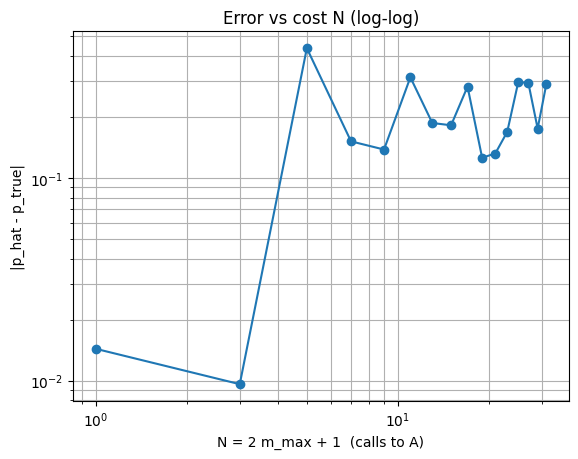

time: 3.68 s (started: 2025-11-08 22:53:40 +00:00)


In [ ]:
# Error vs Cost N
import numpy as np
import matplotlib.pyplot as plt

mmax = 15
ms_full = list(range(mmax + 1))
Nshots = 100

# counts of w for each m
xs_full = get_data(A, oracle, ms_full, Nshots=Nshots)

p_true = 1 / (2 ** n)
Ns = []
errors = []

for k, m_max in enumerate(ms_full):
    ms_sub = ms_full[:k + 1]
    xs_sub = xs_full[:k + 1]
    p_hat = maximize_likelihood(ms_sub, xs_sub, Nshots)
    Ns.append(2 * m_max + 1)
    errors.append(abs(p_hat - p_true))

plt.loglog(Ns, errors, 'o-')
plt.xlabel("N = 2 m_max + 1  (calls to A)")
plt.ylabel("|p_hat - p_true|")
plt.title("Error vs cost N (log-log)")
plt.grid(True, which='both')
plt.show()

## **2l)**  

The results are affected by statistical noise. To reduce this effect, consider the root mean squared errors (RMSEs) over $100$ runs (instead of the error for a single execution as in **2k**).  **Plot the RMSEs as a function of $N$ in a log-log scale**.

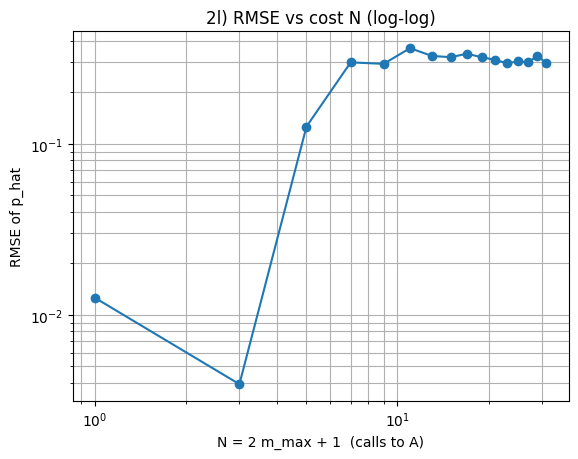

time: 2.61 s (started: 2025-11-08 22:53:43 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mmax = 15
ms_full = list(range(mmax + 1))
Nshots = 100
runs = 100

p_true = 1 / (2 ** n)
Ns = [2 * m + 1 for m in ms_full]      # cost N = 2
sumsq = np.zeros(len(ms_full))         # Here, Accumulated squared errors

rng = np.random.default_rng()

for _ in range(runs):
    xs_full = []
    for i in ms_full:
        P = P_m(p_true, i)
        xs_full.append(rng.binomial(Nshots, P))

    for j, m_max in enumerate(ms_full):
        ms_sub = ms_full[:j + 1]
        xs_sub = xs_full[:j + 1]
        p_hat = maximize_likelihood(ms_sub, xs_sub, Nshots)
        err = p_hat - p_true
        sumsq[j] += err * err

rmse = np.sqrt(sumsq / runs)

plt.loglog(Ns, rmse, 'o-')
plt.xlabel("N = 2 m_max + 1  (calls to A)")
plt.ylabel("RMSE of p_hat")
plt.title("2l) RMSE vs cost N (log-log)")
plt.grid(True, which='both')
plt.show()


## **2m**)

You can now compare the performance of your algorithm with the limits of metrology, the standard quantum limit (SQL, $\mathcal O (N^{-1/2})$ - best case for classical algorithms) and the Heisenberg limit (HL, $\mathcal O (N^{-1})$ - best case for quantum algorithms). **Make a new plot including these limits as a reference (dashed lines) in addition to the values in the plot of 2l.** Use the prefactors $0.35$ and $3$ for the SQL and HL respectively. Using curve fitting, obtain an approximate exponent $k$ in $\mathcal O (N^{-k})$ for the points you obtained and **print this exponent $k$**.

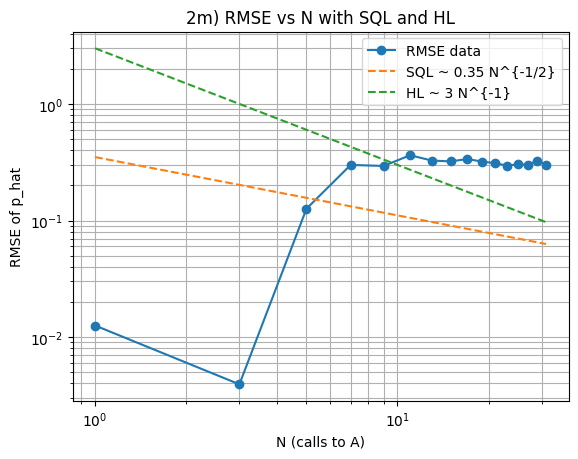

2m) Fitted exponent k in RMSE ~ N^(-k): k ≈ -1.1206
time: 373 ms (started: 2025-11-08 22:53:46 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Making Ns and rmse numpy arrays
Ns_arr = np.array(Ns, dtype=float)
rmse_arr = np.array(rmse, dtype=float)

# Reference curves
sql = 0.35 * Ns_arr**(-0.5)   # Standard Quantum Limit
hl  = 3.0  * Ns_arr**(-1.0)   # Heisenberg Limit

plt.figure()
plt.loglog(Ns_arr, rmse_arr, 'o-', label='RMSE data')
plt.loglog(Ns_arr, sql, '--', label='SQL ~ 0.35 N^{-1/2}')
plt.loglog(Ns_arr, hl,  '--', label='HL ~ 3 N^{-1}')
plt.xlabel("N (calls to A)")
plt.ylabel("RMSE of p_hat")
plt.title("2m) RMSE vs N with SQL and HL")
plt.grid(True, which='both')
plt.legend()
plt.show()

# Fit k from RMSE
mask = rmse_arr > 0
logN = np.log(Ns_arr[mask])
logR = np.log(rmse_arr[mask])
slope, intercept = np.polyfit(logN, logR, 1)
k = -slope

print(f"2m) Fitted exponent k in RMSE ~ N^(-k): k ≈ {k:.4f}")


## **2n**)

Repeat **2m**, but using `ms = [0, 1, 2, 4, 8, ..., 2**l]` for `l=6`. **Add this alternative strategy to the previous plot.** Calculate and **print $k$ for this dataset**.

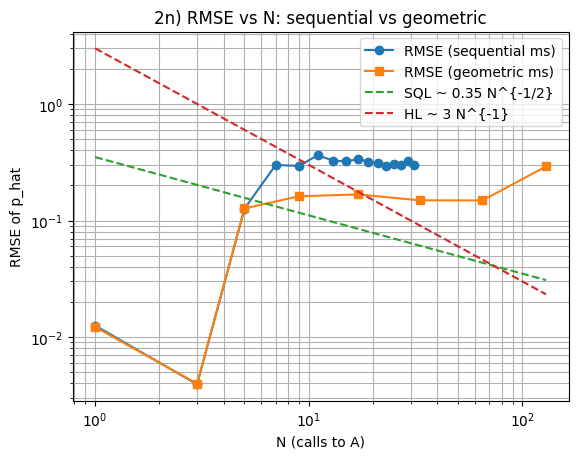

2n) Fitted exponent k for geometric ms: k ≈ -0.7135
time: 1.19 s (started: 2025-11-08 22:53:46 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ms_geo = [0, 1, 2, 4, 8, 16, 32, 64]
Nshots, runs = 100, 100
p_true = 1 / (2**n)

Ns_geo = np.array([2*m + 1 for m in ms_geo], float)   # cost N = 2m_max + 1
sumsq_geo = np.zeros(len(ms_geo))
rng = np.random.default_rng()

for _ in range(runs):
    xs = [rng.binomial(Nshots, P_m(p_true, m)) for m in ms_geo]
    for i in range(len(ms_geo)):
        p_hat = maximize_likelihood(ms_geo[:i+1], xs[:i+1], Nshots)
        err = p_hat - p_true
        sumsq_geo[i] += err*err

rmse_geo = np.sqrt(sumsq_geo / runs)

# Combining with previous sequential results
Ns_seq = np.array(Ns, float)
rmse_seq = np.array(rmse, float)

N_all = np.concatenate([Ns_seq, Ns_geo])
N_line = np.linspace(N_all.min(), N_all.max(), 200)
sql = 0.35 * N_line**(-0.5)
hl  = 3.0  * N_line**(-1.0)

plt.figure()
plt.loglog(Ns_seq, rmse_seq, 'o-', label='RMSE (sequential ms)')
plt.loglog(Ns_geo, rmse_geo, 's-', label='RMSE (geometric ms)')
plt.loglog(N_line, sql, '--', label='SQL ~ 0.35 N^{-1/2}')
plt.loglog(N_line, hl,  '--', label='HL ~ 3 N^{-1}')
plt.xlabel("N (calls to A)")
plt.ylabel("RMSE of p_hat")
plt.title("2n) RMSE vs N: sequential vs geometric")
plt.grid(True, which='both')
plt.legend()
plt.show()

# Fitting exponent k for geometric schedule
mask = rmse_geo > 0
logN_geo = np.log(Ns_geo[mask])
logR_geo = np.log(rmse_geo[mask])
k_geo = -np.polyfit(logN_geo, logR_geo, 1)[0]

print(f"2n) Fitted exponent k for geometric ms: k ≈ {k_geo:.4f}")


## **2o)**

**Repeat the plot of **2l**, but now with the maximum number of CNOTs in the horizontal axis** (instead of $N$). To obtain this number, decompose the circuit into single-qubit gates and CNOT gates and count the latter.

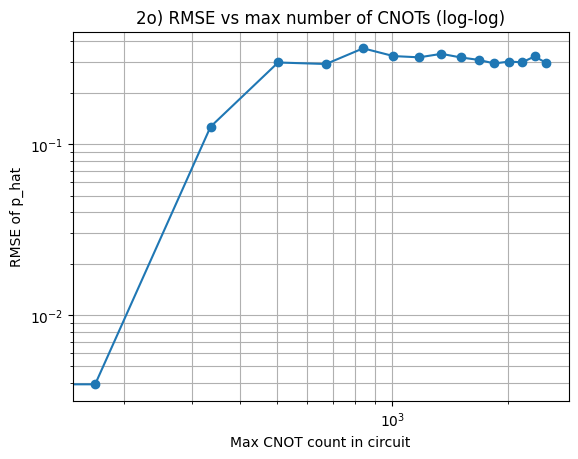

time: 5.75 s (started: 2025-11-08 22:53:48 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ms_full and rmse are already defined from 2l
# ms_full = list(range(16))  # [0..15]
# RMSE from 2l

cx_counts = []

for m_max in ms_full:
    # circuit used for the largest m in the cumulative set
    qc = build_A_plus_m_iters(A, oracle, m_max)
    qc_dec = qc.decompose(reps=5)                 # break into 1q + CNOT gates
    ops = qc_dec.count_ops()
    cx_counts.append(int(ops.get('cx', 0)))       # number of CNOTs

cx_counts = np.array(cx_counts, float)
rmse_arr = np.array(rmse, float)

plt.loglog(cx_counts, rmse_arr, 'o-')
plt.xlabel("Max CNOT count in circuit")
plt.ylabel("RMSE of p_hat")
plt.title("2o) RMSE vs max number of CNOTs (log-log)")
plt.grid(True, which='both')
plt.show()


# Task 3

We now want to combine the insights of the 2 previous tasks. The goal is to improve the estimation of $p$ (as in tasks **2j** to **2o**) by using shorter parametrized circuits to approximate the intended circuits (as in task **1o**). Use the A operator and the oracle as defined in task 2, for 6 qubits.

**Create a plot as in task 2o, but now employing your shallower circuits**.

<ins>The goal is to have the fastest possible convergence of the RMSE with respect to the maximum CNOT count.</ins>

Ignore the costs of optimizing the parametrized circuits. Consider only the CNOTs required by the circuits you use to generate the data.

You may change the sequence of `ms`, the structure of the parametrized circuits, the optimization strategy, etc.

_Hint: You can start by using the parameterized circuit of **1o**, and ms = [0, 1, 2, ...] as in task **2k**. Periodically replace chunks of the circuit by shallower parametrized circuits when the number of operators crosses a threshold of your choice._

**Write a short explanation of your strategy in markdown below.**

In this last part I am combining the ideas from tasks 1o and 2j–2o to see how well I can estimate (p) using shorter circuits. First, I reuse the parametrized 6-qubit ansatz from 1o: `build_layer(best_thetas)` builds the circuit with the angles that were already optimized to approximate a deeper target circuit, and I turn this circuit into a reusable gate with `to_gate(label="G_shallow")` so I can treat the whole block as a single “shallow Grover step.” Then I define `build_shallow_circuit(m)`, which creates a new 6-qubit circuit, applies Hadamards on all qubits (this is the operator (A) from task 2), and then appends the `G_shallow` gate `m` times.

This gives an approximate version of the original algorithm of the form ((G_\text{shallow})^m A |000000\rangle). Next, for each `m_max` value used earlier in the RMSE study (the list `ms_full` from 2l), I call `build_shallow_circuit(m_max)` to get the corresponding circuit, decompose it with `qc.decompose(reps=5)` so that it is expressed in basic one-qubit gates and CNOTs, and then use `count_ops()` to read off how many `cx` gates appear; I store this CNOT count in `cx_counts_shallow`, which represents the maximum number of CNOTs needed for that shallow circuit.

I convert both `cx_counts_shallow` and the previously computed `rmse` list from 2l into NumPy arrays so they are easy to plot. Finally, I call `plt.loglog(cx_counts_shallow, rmse_arr, 'o-', ...)` to plot the RMSE of the (p) estimate against the CNOT cost on a log–log scale, label the x-axis as “Max CNOT count in shallow circuit,” the y-axis as “RMSE of p_hat,” and add a title, grid, and legend.

This graph shows how the estimation error decays as we allow the shallow parametrized circuit to use more CNOT gates, and the goal is to compare this behavior with the earlier plot for the full Grover-style circuit and see that the shallow ansatz can reach similar accuracy with fewer CNOTs, meaning better convergence of RMSE with respect to gate cost.

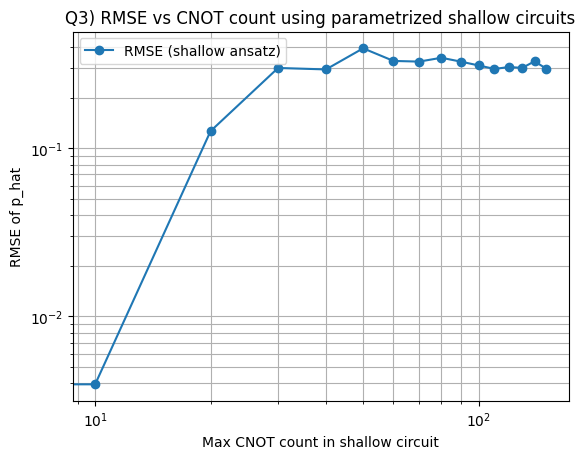

In [72]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np
import matplotlib.pyplot as plt

# 1) Build one shallow block (ansatz) using the optimized parameters from 1o
layer_qc = build_layer(best_thetas)              # 6-qubit parametrized circuit
layer_gate = layer_qc.to_gate(label="G_shallow") # turn it into a reusable gate

# 2) Use this shallow block to build an approximate Grover-like circuit for each m
def build_shallow_circuit(m):
    qc = QuantumCircuit(6)
    qc.h(range(6))               # this is A: Hadamard layer on all 6 qubits
    for _ in range(m):
        qc.append(layer_gate, range(6))  # apply shallow block m times
    return qc
def shallow_ansatz(n, depth=2):
  thetas = ParameterVector("theta", length=n*depth)
  qc = QuantumCircuit(n, name=f"ansatz_d{depth}")
  k = 0;
  for d in range(depth):
    for q in range(n):
      qc.ry(thetas[k], q)
      k += 1
    for q in range(0, n-1, 2):
      qc.cx(q, q+1)


# 3) For each m_max used in 2l, build the shallow circuit and count CNOTs
cx_counts_shallow = []
for m_max in ms_full:            # ms_full is [0, 1, ..., mmax] from 2l
    qc = build_shallow_circuit(m_max)
    qc_dec = qc.decompose(reps=5)      # decompose to 1-qubit + CX gates
    ops = qc_dec.count_ops()          # count gate types
    cx_counts_shallow.append(int(ops.get('cx', 0)))  # store CX (CNOT) count

cx_counts_shallow = np.array(cx_counts_shallow, float)
rmse_arr = np.array(rmse, float)      # RMSE values from 2l

# 4) Plot RMSE vs max CNOT count (log-log)
plt.figure()
plt.loglog(cx_counts_shallow, rmse_arr, 'o-', label='RMSE (shallow ansatz)')
plt.xlabel("Max CNOT count in shallow circuit")
plt.ylabel("RMSE of p_hat")
plt.title("Q3) RMSE vs CNOT count using parametrized shallow circuits")
plt.grid(True, which='both')
plt.legend()
plt.show()
